# Data Exploration: Analyzing the Trends in Genetic Condition Description and Cause Data

Using ML to predict disease causes has long been a task at the forefront of computational biology research. Getting semantic understanding of disease causes would lead to better identification of patterns and correlations that might be difficult to detect with the human eye, leading to higher accuracy in diagnosis, earlier detection of diseases, and better treatment outcomes. Disease cause prediction may also advance personalized medicine; by identifying common risk factors and symptoms, doctors and researchers can develop more targeted prevention and treatment strategies. In this project, we aim to predict the causes of a genetic condition based on its description (which can be seen as a proxy for patient medical history data - ideally, we would use patient data, which would be part of our future steps). 

In [4]:
import pandas as pd
df = pd.read_csv("masked.csv")

In [5]:
df

,name,description,causes,frequency,inheritance,causes_masked
0,Tangier disease,Tangier disease is an inherited disorder chara...,Mutations in theABCA1gene cause Tangier diseas...,Tangier disease is a rare disorder with approx...,This condition is inherited in anautosomal rec...,Mutations in MASK cause DISEASE NAME . This ge...
1,Ataxia-telangiectasia,Ataxia-telangiectasia is a rare inherited diso...,Variants (also called mutations) in theATMgene...,"Ataxia-telangiectasia occurs in 1 in 40,000 to...",Ataxia-telangiectasia is inherited in anautoso...,Variants ( also called mutations ) in MASK cau...
2,Alopecia areata,Alopecia areata is a common disorder that caus...,The causes of alopecia areata are complex and ...,"Alopecia areata affects 1 in every 500 to 1,00...",The inheritance pattern of alopecia areata is ...,The causes of DISEASE NAME are complex and not...
3,Triple A syndrome,Triple A syndrome is an inherited condition ch...,Mutations in theAAASgene cause triple A syndro...,"Triple A syndrome is a rare condition, althoug...",This condition is inherited in anautosomal rec...,Mutations in MASK cause DISEASE NAME . This ge...
4,Aromatic l-amino acid decarboxylase deficiency,Aromatic l-amino acid decarboxylase (AADC) def...,Mutations in theDDCgene cause AADC deficiency....,AADC deficiency is a rare disorder. Only about...,This condition is inherited in anautosomal rec...,Mutations in MASK cause MASK deficiency . MASK...
...,...,...,...,...,...,...
321,Spastic paraplegia type 11,Spastic paraplegia type 11 is part of a group ...,Mutations in theSPG11gene cause spastic parapl...,Over 100 cases of spastic paraplegia type 11 h...,This condition is inherited in anautosomal rec...,Mutations in MASK cause DISEASE NAME . MASK pr...
322,Spastic paraplegia type 49,Spastic paraplegia type 49 is part of a group ...,Spastic paraplegia type 49 is caused by mutati...,Spastic paraplegia type 49 is a rare disorder....,This condition is inherited in anautosomal rec...,DISEASE NAME is caused by mutations in MASK . ...
323,JAK3-deficient severe combined immunodeficiency,JAK3-deficient severe combined immunodeficienc...,JAK3-deficient SCID is caused by mutations in ...,JAK3-deficient SCID accounts for an estimated ...,This condition is inherited in anautosomal rec...,MASK deficient MASK is caused by mutations in ...
324,Pulmonary arterial hypertension,Pulmonary arterial hypertension is a progressi...,Mutations in theBMPR2gene are the most common ...,"In the United States, about 1,000 new cases of...",Pulmonary arterial hypertension is usually spo...,Mutations in MASK are the most common genetic ...


##Looking at Length Distribution and Term/Bigram Frequency

**Why look at length?**
For LLM tasks, knowing the string lengths of the data is important because LLMs use a technique called "self-attention" to process sequences of text. Self-attention allows the model to weigh the importance of different words in a sentence or document when making predictions or classifications. However, the amount of computation required for self-attention grows quadratically with the length of the input sequence, which can make processing long sequences prohibitively slow and memory-intensive. Knowing the length of the input sequences is important when working with the LLM because it determines the amount of padding that needs to be added to each sequence. If the input sequences are too long, it can lead to excessive padding, which can slow down training and inference. On the other hand, if the input sequences are too short, important information may be lost and performance may suffer. We can look at the distribution of the description/cause lengths to see how long most observations are to choose the length of the input sequence.

In [6]:
df["length_of_description"] = df["description"].apply(len)
df["length_of_description"]

0      1124
1      1888
2      1438
3      2529
4      1478
       ... 
321    2070
322    2832
323     805
324    1338
325    1443
Name: length_of_description, Length: 326, dtype: int64

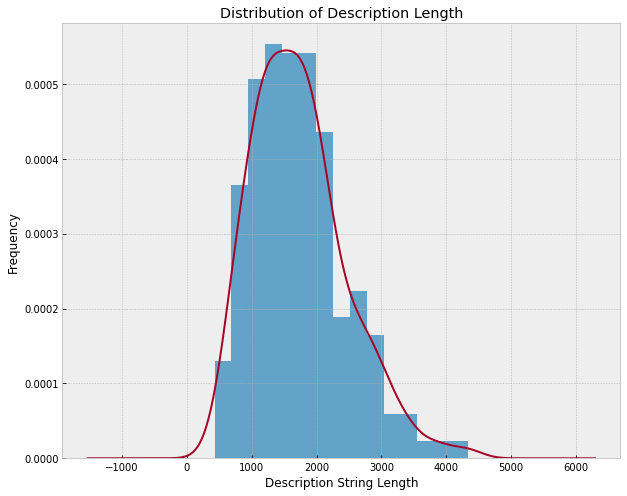

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,8))
df["length_of_description"].plot(kind = "hist", bins = 15, alpha = 0.75, density = True)
df["length_of_description"].plot(kind = "kde")
ax.set_ylabel("Frequency")
ax.set_xlabel("Description String Length")
ax.set_title("Distribution of Description Length")

# ax.tick_params(left = False, bottom = False)
# for ax, spine in ax.spines.items():
#     spine.set_visible(False)

plt.style.use("bmh")
ax.grid(True)

plt.show()

We can see that the description length has a right-skewed normal distribution with a mean around 1500. 

In [63]:
#remove "MASK"
df["cut_causes_masked"] = df['causes_masked'].str.replace('MASK', '', case=False)
df["cut_causes_masked"] = df['cut_causes_masked'].str.replace('DISEASE NAME', '', case=False)

df["cause_length_post_mask"] = df["cut_causes_masked"].apply(len)
df["cause_length_pre_mask"] = df["causes"].apply(len)


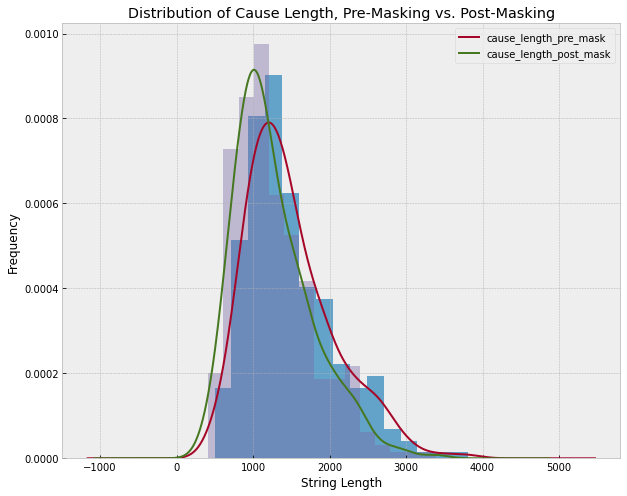

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,8))
df["cause_length_pre_mask"].plot(kind = "hist", bins = 15, alpha = 0.75, density = True)
df["cause_length_pre_mask"].plot(kind = "kde", legend = True)

df["cause_length_post_mask"].plot(kind = "hist", bins = 15, alpha = 0.4, density = True)
df["cause_length_post_mask"].plot(kind = "kde", legend = True)

ax.set_ylabel("Frequency")
ax.set_xlabel("String Length")
ax.set_title("Distribution of Cause Length, Pre-Masking vs. Post-Masking")

# ax.tick_params(left = False, bottom = False)
# for ax, spine in ax.spines.items():
#     spine.set_visible(False)

plt.style.use("bmh")
ax.grid(True)

plt.show()

Here, non-surprisingly, we can see that the mean of the cause length post-mask is less than the mean of the cause length pre-mask. This is cool to see as we can get an idea of how much medical terminology is in the data and how much semantic data we are left with after masking for the model to train on - here, it appears that we did not lose much. 

###Looking at Term Frequency

**Why?** LLMs have a fixed vocabulary size, typically around 30,000 to 50,000 words. By looking at the top 50 words in a corpus, we can get a sense of how many of those words are already in the vocabulary. If many of the top words are not in the vocabulary, we may need to consider expanding the vocabulary or fine-tuning the model to better handle those words.

Depending on the domain of the text data, there may be certain words or phrases that are unique to that domain and may not be well represented in the LLM 
vocabulary. By looking at the top 50 words, we can identify any domain-specific words that may need to be added to the vocabulary or fine-tuned during training.


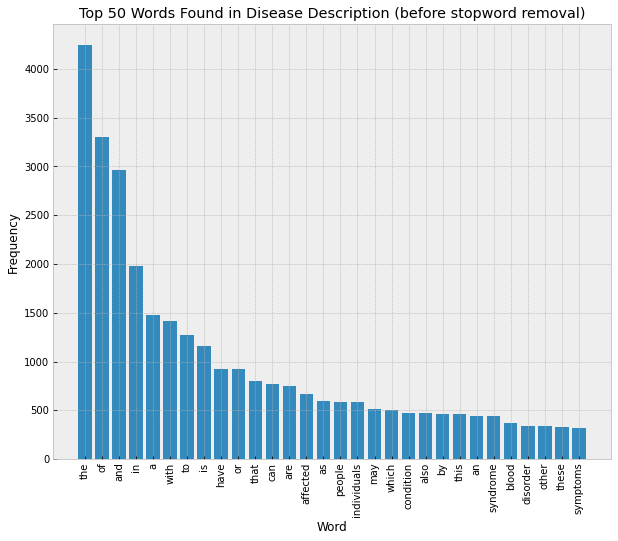

In [47]:
from collections import Counter

fig, ax = plt.subplots(figsize = (10,8))

# tokenize the text column into words and convert to lowercase
words = df['description'].str.lower().str.split(expand=True).stack()

# count the frequency of each word
word_counts = Counter(words)

# get the top 50 most frequent words
top_words = word_counts.most_common(30)

# create a bar plot of the top 50 most frequent words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Words Found in Disease Description (before stopword removal)')
plt.show()

We can see that the top 50 words include stopwords like "the" and "of". Let's see what we get when we remove them and get words that are more descriptive of our data.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


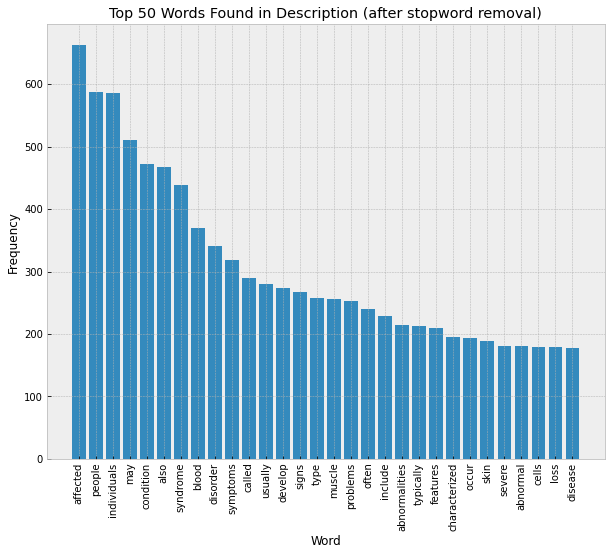

In [49]:
from nltk.corpus import stopwords

fig, ax = plt.subplots(figsize = (10,8))

import nltk
nltk.download('stopwords')

# remove stopwords
stop_words = set(stopwords.words('english'))
words = words[~words.isin(stop_words)]

# count the frequency of each word
word_counts = Counter(words)

# get the top 50 most frequent words
top_words = word_counts.most_common(30)

# create a bar plot of the top 50 most frequent words
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Words Found in Description (after stopword removal)')
plt.show()

We can see that the top words include "affected", "people", and "individuals". It seems that these are the top words that are generalized to every genetic condition in the dataset. It's not surprising that most are medical terminology such as "syndrome", "symptoms", "muscle", etc.

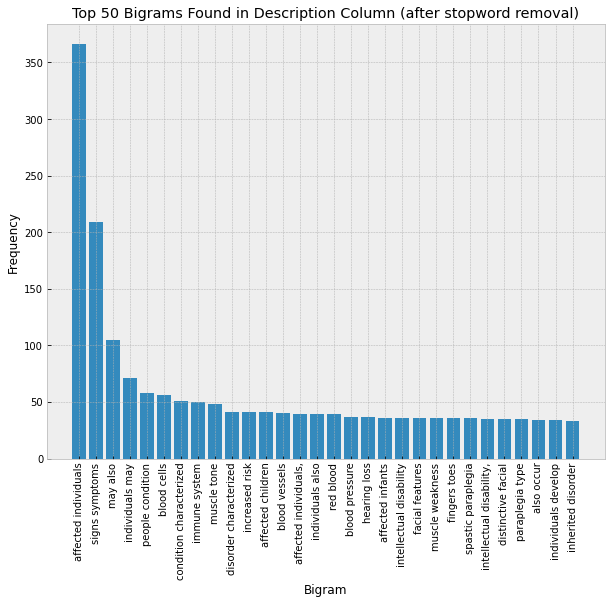

In [56]:
from nltk import bigrams

fig, ax = plt.subplots(figsize = (10,8))
words = df['description'].str.lower().str.split()

# remove stopwords
stop_words = set(stopwords.words('english'))
words = [[word for word in sentence if word not in stop_words] for sentence in words]

# extract bigrams
bigrams_list = [list(bigrams(sentence)) for sentence in words]
bigrams_flat = [item for sublist in bigrams_list for item in sublist]

# count the frequency of each bigram
bigram_counts = Counter(bigrams_flat)

# get the top 30 most frequent bigrams
top_bigrams = bigram_counts.most_common(30)

# convert bigrams to strings
top_bigrams = [' '.join(bigram) for bigram, count in top_bigrams]

plt.bar(top_bigrams, [count for bigram, count in bigram_counts.most_common(30)])
plt.xticks(rotation=90)
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.title('Top 50 Bigrams Found in Description Column (after stopword removal)')
plt.show()

These are the top bigrams that occur in the description after stopword removal. We can observe common language patterns in this medical data - "cells" frequently comes after "blood", "symptoms comes after "signs", etc. 

###Move to Machine Learning Colab

Since we have semantic data, much of our data exploration meshes with our ML aspect of the project (we did some data exploration with the word embeddings themselves). The rest of our data exploration is in the ML notebook (PCA scatterplots, word clouds). 